In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


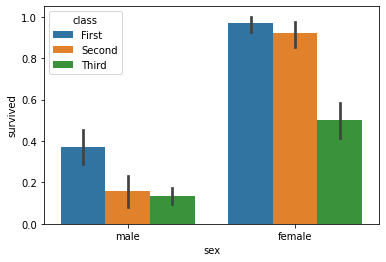

In [23]:
sns.barplot(data=df,x='sex',y='survived',hue='class')

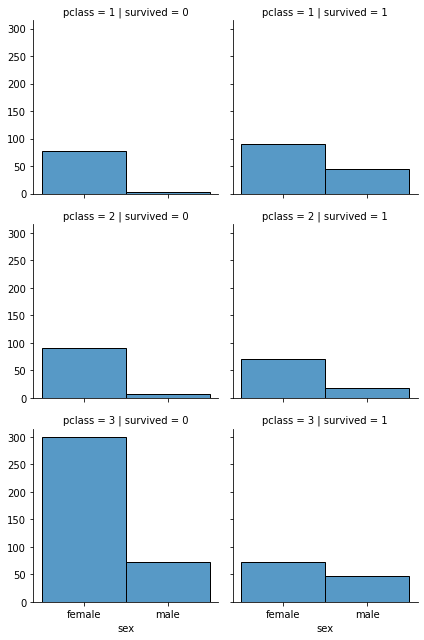

In [122]:
# 瞭解性別在各艙等的分布的存活率
g=sns.FacetGrid(df,col='survived',row='pclass')
g.map(sns.histplot,'sex')

In [ ]:
#先檢視各艙位存活人數，此時可以使用groupby函數進行分類，

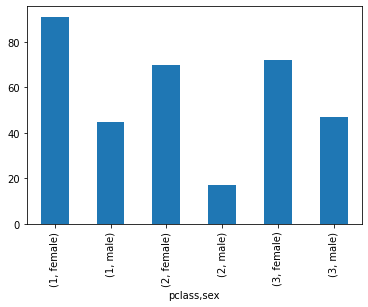

In [58]:
df.groupby('pclass').survived.sum()
survived=df.groupby(['pclass','sex']).survived.sum()
survived.plot(kind='bar')

In [80]:
#使用pd.crosstab函數繪製交叉表，交叉表可以很直觀的依據艙位等級及性別來查看存活人數及死亡人數。
#繪製堆疊條形圖，x軸代表依據艙等分成男性及女性，y軸代表人數，其中藍色代表死亡人數，橘色代表存活人數。
survived_counts = pd.crosstab([df.pclass, df.sex],df.survived)
survived_counts

survived         0   1
pclass sex            
1      female    3  91
       male     77  45
2      female    6  70
       male     91  17
3      female   72  72
       male    300  47

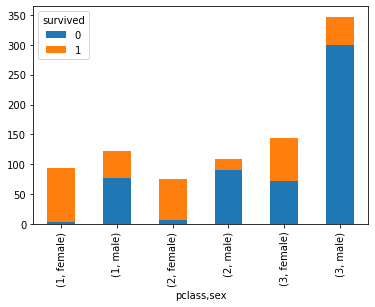

In [109]:
survived_counts.plot(kind='bar',stacked=True)

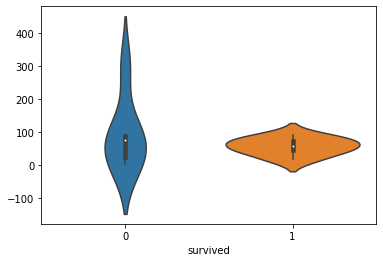

In [112]:
# 直接使用PANDAS dataframe, 當作參數
#條形圖()顯示分類變數和連續變數之間的關係。數據以矩形條表示,其中條的長度表示該類別中數據的比例。
sns.violinplot(data=survived_counts)

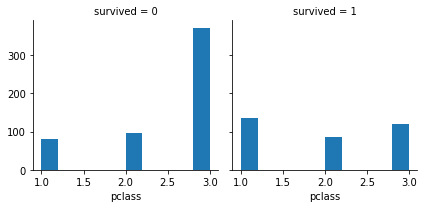

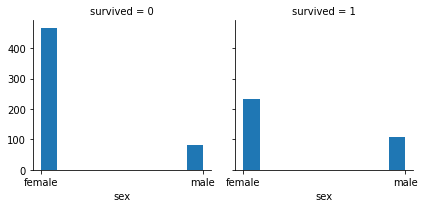

In [118]:
g = sns.FacetGrid(df,col='survived')
g.map(plt.hist,'pclass')
h = sns.FacetGrid(df,col='survived')
h.map(plt.hist,'sex')